# A very brief introduction to `sympy` and `numpy`
## Lists in python
This is a small introductory notebook going through some basic aspects regarding python and linear algebra. 
A very important object in python is a list, for example.

Here are the official documentations of `numpy`: https://numpy.org/doc/stable/reference/index.html
adn the documentation of `sympy`: https://docs.sympy.org/latest/reference/index.html

In [1]:
a = [1,2,3]
print(a)

[1, 2, 3]


We can access the elements of the list `a` as follows:

In [2]:
first_element = a[0]
second_element = a[1]
third_element = a[2]

print(first_element)
print(second_element)
print(third_element)

1
2
3


In python a list can contain any data type, and you can even mix them if you want. In particular, a list can contain a list. For example all of the following are permissible:

In [3]:
l1 = ['a', 1, 'b', 2]
l2 = [[1,2], [3, 4], l1]
print(f"{l1[0]=}")
print(f"{l2[0]=}")
print(f"{l2[2]=}")

l1[0]='a'
l2[0]=[1, 2]
l2[2]=['a', 1, 'b', 2]


Can Python represent matrices? One way you can think about a matrix is that it is characterised by its rows.

Say we have the matrix 
$$
A=
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{bmatrix},
$$
then we could capture the information of the matrix, by creating a list, whose entries are lists that represent the rows. So we could for example represent $A$ in python like this:

In [4]:
A = [[1,2,3], [4,5,6], [7,8,9]]
print(A)

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]


The 'problem' is that python doesn't inherently understand that we are thinking about a matrix here and we may want to do things with it that only make sense in the context of matrices, such as row reduce the matrix, multiply two matrices, add two matrices and much more.

Such functionality is not implemented in python directly, and instead we will use two very established libraries that have this kind of functionality: `numpy` (standing for 'numerical python') and `sympy` (standing for symbolic python). They  serve different purposes and will have slightly different syntax.  

You can think of these libraries/modules as big python files that contain lots of different functions, and by importing them we gain access to these functions. We can do this as follows:



In [5]:
import numpy
import sympy

Now maybe (in theory) `numpy` and `sympy` both have a function called `do_something`. This could be a problem since if I were to call `do_something` then python doesn't know whether it should take the function with this name that is defined in `numpy` or the function with the same name from `sympy`! Fortunately the default syntax in this situation is, that if I want to call `do_something` from `numpy` then I need to write `numpy.do_something` and if I want to call `do_something` from sympy then I need to write `sympy.do_something`.

Since it is somewhat tedious to write `sympy.` and `numpy.` in front of everything we can be slightly more efficient if we import the libraries as follows:

In [6]:
import numpy as np
import sympy as sy
sy.init_printing() # This makes things coming from sympy look a little prettier

Now if I want to call `do_something` from `numpy` I only need to write `np.do_something`, and if I want to call `do_something` from sympy I can do this via `sy.do_something`. Anyway, let's look at some examples.

`sympy` can do matrix calculations. In order for the module to be able to manipulate a matrix, we need to feed it to the program in a way so that it is familiar with. Recall how we defined our matrix A before:

In [7]:
A = [[1,2,3], [4,5,6], [7,8,9]]
print(A)

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]


In order for `sympy` to understand that this is a matrix (and not just a list of lists) we do the following:

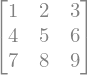

In [8]:
A = sy.Matrix([[1,2,3], [4,5,6], [7,8,9]])
A

Now `A` is not just a list of lists but it is a `sympy.Matrix` object - this now allows the `sympy` module to do all sorts of things related to matrices. For example, we may be interested in row reducing A, which we can easily do: 

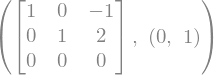

In [12]:
B = A.rref()
B

That looks nice! But what is the $(0,1)$ doing here? It's telling is that the columns $0$ and $1$ are the pivot columns (recall that everything is $0$-indexed here, so those are really the first and the second column of the matrix).

What happened is that we applied a function to $A$, namely the `sympy` function `rref()`, which has two outputs: First it gives us the reduced echelon form of $A$, and secondly it gives us a tuple of the pivot columns. As a result, the variable `B` in the block above actually stores two things and is not just a matrix. If we want just the matrix, we could do so by calling `B[0]`:

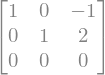

In [13]:
B[0]

In [14]:
B[1]

Note that this didn't actually change our matrix `A` but rather we created a new one, which is the reduced echelon form of `A`. If we were to call  `A` now we would still get the original shape:

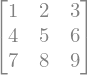

In [15]:
A

## Solving linear systems using `sympy`
Say we're trying to find solutions to the linear system given by
\begin{align}
3x + 4y &= 5 \\ 
x - y &=7.
\end{align}
Recall that we can encapsulate this information using the augmented matrix
$$
A=
\begin{bmatrix}
3 & 4 & 5 \\
1 & -1 & 7
\end{bmatrix},
$$
where you just imagine that there is a vertical bar before the last column. There are two ways of dealing with this: First we can just take $A$ and row reduce it using sympy, from which we can read off the solution.

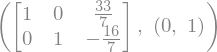

In [16]:
A = sy.Matrix([[3,4,5], [1,-1,7]])
A.rref()

And we see immediately that the unique solution is $x = 33/7, y = -16/7$.

`sympy` can also directly solve a linear system for us. To do this, we need to create some variables (we can call them whatever we want) using sympy. In our case there are two variables. For a change, let's call them $x_1$ and $x_2$: 

In [17]:
x1, x2 = sy.symbols('x1, x2')

Now we do the folling:

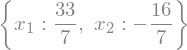

In [20]:
sy.solve_linear_system(A, x1, x2)

In fact, sympy can also deal with the situation where we might have no solutions, or infinitely many solutions. Let's look at some examples:

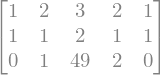

In [21]:
x1, x2, x3, x4 = sy.symbols('x1, x2, x3, x4')

A1 = sy.Matrix([[1,2,3,2,1], [1,1,2,1,1], [0,1,49, 2, 0]])
A1


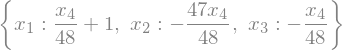

In [22]:
sy.solve_linear_system(A1, x1, x2, x3, x4)

So in this example, for the matrix `A1` there are infinitely many solutions, since any value for $x_4$ will give rise to a valid solution.

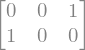

In [23]:
A2 = sy.Matrix([[0,0,1], [1,0,0]])
A2

In [24]:
sy.solve_linear_system(A2, x1, x2)

We get nothing, since the system associated to the matrix above doesn't have a solution.

## Elementary functions and variables in `sympy`
`sympy` can also deal with well known functions such as the trigonometric functions and their relationship to fundamental constants, such as pi. We can import these as follows:

In [25]:
from sympy import sin, cos, pi


It is a fact, that you will later learn in this course, that a point $(x,y)$ in the Euclidean plane can be rotated about the origin by an angle $\theta$ by multiplying the rotation matrix

$$
R_\theta=
\begin{bmatrix}
\cos(\theta) & \sin(\theta) \\
-\sin(\theta) & \cos(\theta)
\end{bmatrix}.
$$

It is also a fact that something called the determinant of $R_\theta$ is always equal to $1$. We can verify this for a few examples using `sympy`

In [26]:
theta = pi/12

R = sy.Matrix([[cos(theta), sin(theta)], [-sin(theta), cos(theta)]])
R.det()

In particular, what is interesting to not here is that the value we get is precisely the integer $1$. Usually one would expect to obtain a real number close to $1$ since at the end of the day this is a computer dealing with numbers and there will always be some floating point errors. But the way that `sympy` works, is that it is aware of the algebraic properties of cosine, sine etc and will be able to use this in its computations.

In fact, `sympy` can deal with variables that don't have a specified value yet. For example:

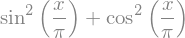

In [27]:
x = sy.symbols('x')

theta = x/pi
R = sy.Matrix([[cos(theta), sin(theta)], [-sin(theta), cos(theta)]])
R.det()

Now a human can verify that this is always $1$, but it did the hard work for us! In fact, suppose (which is the type of question you might get on an exam or a problem sheet) that you are asked the following question:

For which real values of $f$ does the following system of equations in $x$ and $y$ have no solution, exactly one solution or infinitely many solutions? The system is given by

\begin{align}
x + 2y  &= 1 \\
2x + fy &= 3.
\end{align}

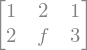

In [28]:
x, y, f = sy.symbols('x, y, f')
A = sy.Matrix([[1, 2, 1], [2, f, 3]])
A

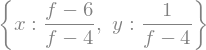

In [29]:
sy.solve_linear_system(A, x, y)

Something seems suspicious about the case when $f = 4$, so you may have to think about what happens then, but otherwise we get a solution! We can also row reduce $A$, in the hopes of getting some further insight.

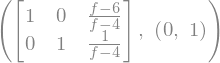

In [30]:
A.rref()

## `numpy` basics
`numpy` is a python library, implemented in C, that allows for very fast and efficient matrix related numerical computations. Its use case is inherently different from the one of `sympy` and therefore the functionalities differ. For example, numpy won't be able to row reduce a matrix. Why not? Well, numpy doesn't work with precise expressions such as fractions but rather with floating point values. For example, numerically speaking a computer may not evaluate $(1 / 3) * 3$ to exactly $1$ but instead it might evaluate it to $0.999999999$. This is (most of the time) insignificant but this can lead to a wrong row reduced echelon form with fundamentally wrong qualitative properties (for example the number of pivots might be wrong). 

This may sound annoying, but the truth is that in the real world, working with real data you will very rarely encounter two numbers that are the same. In fact, if you were to weigh objects with an extremely precise scale the probabilty that you will weigh two objects with the same weight is essentially zero. 

In `numpy` you can tell the library that you would like to consider a matrix in a similar manner to `sympy`, but instead it is called a `numpy.array`.

In [31]:
A = np.array([[1,2], [5,6]])
A

array([[1, 2],
       [5, 6]])

In [32]:
B = np.array([[1,0], [1,3]])
B

array([[1, 0],
       [1, 3]])

We can add two matrices in the expected way

In [33]:
A + B

array([[2, 2],
       [6, 9]])

We can multiply two matrices using `@`:

In [34]:
A @ B

array([[ 3,  6],
       [11, 18]])

We can also use `np.matmul(A,B)` to achieve the same:

In [35]:
np.matmul(A,B)

array([[ 3,  6],
       [11, 18]])

If we try to do `A * B` we get something different:

In [36]:
A * B

array([[ 1,  0],
       [ 5, 18]])

`A * B` computes the coordinate-wise product of the matrix entries as opposed to the matrix product, which serves a very different purpose!

We can also compute the determinant:


In [37]:
np.linalg.det(A)

And we can also find the inverse of a matrix (if it exists):

In [38]:
np.linalg.inv(A)

array([[-1.5 ,  0.5 ],
       [ 1.25, -0.25]])